**Q.1 Your views about the problem statement?**

Ans- The problem statement is interesting because it focuses on predicting rainfall, which is a real-world issue with practical applications, like helping people plan their daily activities or making decisions in industries like agriculture. In this project we using machine learning models to analyze weather data,there was a small newspaper company called "The Daily Buzz. we can make more accurate predictions about whether it will rain tomorrow. This kind of project also gives us a chance to practice and improve our skills in working with classification models and ensemble techniques like Random Forest and Gradient Boosting.

**Q.2  What will be your approach to solving this task?**

Ans- To solve this task, my approach would follow these steps:
* **Load and Explore the Data:** In the first step, I would load the weather data from 2008 to 2017 and explore it to understand what kind of information it contains. This includes looking at columns like temperature, humidity, and rainfall, and identifying any missing data or outliers.
* **Data Preprocessing:** I would clean the dataset by handling missing values, transforming categorical variables (like 'RainToday' and 'RainTomorrow') into numbers, and removing unnecessary columns like 'Date' and 'Location' that don’t directly help in prediction.
* **Model Selection:** Then,I would start by building a Decision Tree model to get a basic understanding of how the data can be used for prediction. Then, I would try more advanced models, like Random Forest and Gradient Boosting, Boosting and Bagging etc.
* **Model Evaluation:** After building the models, I would evaluate their performance by calculating the accuracy score and using a confusion matrix to see how well each model predicts rainfall.
* **Final Model Selection:** In the final step once I know which model gives the highest accuracy, I would analyze why this model performed better and think about ways to improve it further (like tuning parameters or adding more features).

**Q.3  What were the available ML model options you had to perform this task?**

Ans- According to the this task, there were several machine learning models available for performing this task such as:
* **Decision Tree Classifier:** This is a simple model that splits the data into branches based on certain conditions (like temperature, humidity, etc.). It’s easy to understand and interpret but may not be as accurate as other models.
* **Random Forest:** This is a more advanced model that creates many decision trees and combines their results to make more accurate predictions. It reduces the chance of overfitting.
* **Gradient Boosting:** This method builds decision trees one after the other, each one trying to fix the errors of the previous tree. It’s very powerful for improving accuracy.
* **AdaBoost and XGBoost:** These are also boosting methods like Gradient Boosting, but with different techniques to combine weak learners (simple models) into a strong one.
* **Logistic Regression:** bold text A model used for binary classification (like predicting yes/no for rain). It’s simple and works well when there’s a linear relationship between the data and the target.
* **LDA (Linear Discriminant Analysis):** A classification method that’s useful when the data is normally distributed.
* **K-Nearest Neighbors (KNN):** This model predicts the outcome by looking at the "neighbors" (similar data points) around it.

# Import the liberary

In [ ]:
# Import the necessacry liberary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# EDA Analysis
## Load the Dataset

In [ ]:
df= pd.read_excel('/content/drive/MyDrive/Colab Notebooks/sydney_rain prediction.xlsx', header=0)
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-02-01   Sydney     19.5     22.4      15.6          6.2       0.0   
1 2008-02-02   Sydney     19.5     25.6       6.0          3.4       2.7   
2 2008-02-03   Sydney     21.6     24.5       6.6          2.4       0.1   
3 2008-02-04   Sydney     20.2     22.8      18.8          2.2       0.0   
4 2008-02-05   Sydney     19.7     25.7      77.4          NaN       0.0   

   Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
0         92.0         84.0       1017.6       1017.4       8.0       8.0   
1         83.0         73.0       1017.9       1016.4       7.0       7.0   
2         88.0         86.0       1016.7       1015.6       7.0       8.0   
3         83.0         90.0       1014.2       1011.8       8.0       8.0   
4         88.0         74.0       1008.3       1004.8       8.0       8.0   

   Temp9am  Temp3pm RainToday RainTomorrow  
0     20.7     20.9       Yes          Yes  
1     22.4     24.8       Yes          Yes  
2     23.5     23.0       Yes          Yes  
3     21.4     20.9       Yes          Yes  
4     22.5     25.5       Yes          Yes

In [ ]:
# Drop unnecessary columns like 'Date' and 'Location'
del df['Date']
del df['Location']

In [ ]:
# Display the first few rows of the DataFrame
df.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
0     19.5     22.4      15.6          6.2       0.0         92.0   
1     19.5     25.6       6.0          3.4       2.7         83.0   
2     21.6     24.5       6.6          2.4       0.1         88.0   
3     20.2     22.8      18.8          2.2       0.0         83.0   
4     19.7     25.7      77.4          NaN       0.0         88.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         84.0       1017.6       1017.4       8.0       8.0     20.7   
1         73.0       1017.9       1016.4       7.0       7.0     22.4   
2         86.0       1016.7       1015.6       7.0       8.0     23.5   
3         90.0       1014.2       1011.8       8.0       8.0     21.4   
4         74.0       1008.3       1004.8       8.0       8.0     22.5   

   Temp3pm RainToday RainTomorrow  
0     20.9       Yes          Yes  
1     24.8       Yes          Yes  
2     23.0       Yes          Yes  
3     20.9       Yes          Yes  
4     25.5       Yes          Yes

## Create a dummy variable

In [ ]:
df=pd.get_dummies(df, columns=['RainToday', 'RainTomorrow' ], drop_first=True, dtype=int)
df.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
0     19.5     22.4      15.6          6.2       0.0         92.0   
1     19.5     25.6       6.0          3.4       2.7         83.0   
2     21.6     24.5       6.6          2.4       0.1         88.0   
3     20.2     22.8      18.8          2.2       0.0         83.0   
4     19.7     25.7      77.4          NaN       0.0         88.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         84.0       1017.6       1017.4       8.0       8.0     20.7   
1         73.0       1017.9       1016.4       7.0       7.0     22.4   
2         86.0       1016.7       1015.6       7.0       8.0     23.5   
3         90.0       1014.2       1011.8       8.0       8.0     21.4   
4         74.0       1008.3       1004.8       8.0       8.0     22.5   

   Temp3pm  RainToday_Yes  RainTomorrow_Yes  
0     20.9              1                 1  
1     24.8              1                 1  
2     23.0              1                 1  
3     20.9              1                 1  
4     25.5              1                 1

In [ ]:
# check for missing value
df.isna().sum()

MinTemp               3
MaxTemp               2
Rainfall              6
Evaporation          51
Sunshine             16
Humidity9am          14
Humidity3pm          13
Pressure9am          20
Pressure3pm          19
Cloud9am            566
Cloud3pm            561
Temp9am               4
Temp3pm               4
RainToday_Yes         0
RainTomorrow_Yes      0
dtype: int64

## Fill the missing value with mean

In [ ]:
# Fill missing values in each column with the mean of that column
for column in df.columns:
    if df[column].isnull().any():
        # Use mean to fill for numerical columns
        df[column].fillna(df[column].mean(), inplace=True)

<ipython-input-7-24014cbbd0f4>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [ ]:
# Display the first few rows to verify the changes
df.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
0     19.5     22.4      15.6     6.200000       0.0         92.0   
1     19.5     25.6       6.0     3.400000       2.7         83.0   
2     21.6     24.5       6.6     2.400000       0.1         88.0   
3     20.2     22.8      18.8     2.200000       0.0         83.0   
4     19.7     25.7      77.4     5.187432       0.0         88.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         84.0       1017.6       1017.4       8.0       8.0     20.7   
1         73.0       1017.9       1016.4       7.0       7.0     22.4   
2         86.0       1016.7       1015.6       7.0       8.0     23.5   
3         90.0       1014.2       1011.8       8.0       8.0     21.4   
4         74.0       1008.3       1004.8       8.0       8.0     22.5   

   Temp3pm  RainToday_Yes  RainTomorrow_Yes  
0     20.9              1                 1  
1     24.8              1                 1  
2     23.0              1                 1  
3     20.9              1                 1  
4     25.5              1                 1

In [ ]:
# get the summury of the data like dtype ,row and column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MinTemp           3337 non-null   float64
 1   MaxTemp           3337 non-null   float64
 2   Rainfall          3337 non-null   float64
 3   Evaporation       3337 non-null   float64
 4   Sunshine          3337 non-null   float64
 5   Humidity9am       3337 non-null   float64
 6   Humidity3pm       3337 non-null   float64
 7   Pressure9am       3337 non-null   float64
 8   Pressure3pm       3337 non-null   float64
 9   Cloud9am          3337 non-null   float64
 10  Cloud3pm          3337 non-null   float64
 11  Temp9am           3337 non-null   float64
 12  Temp3pm           3337 non-null   float64
 13  RainToday_Yes     3337 non-null   int64  
 14  RainTomorrow_Yes  3337 non-null   int64  
dtypes: float64(13), int64(2)
memory usage: 391.2 KB


In [ ]:
#use describe function

# Get descriptive statistics for numerical columns
df.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  3337.000000  3337.000000  3337.000000  3337.000000  3337.000000   
mean     14.865057    23.002339     3.330231     5.187432     7.179374   
std       4.551593     4.493290     9.886270     2.756095     3.801737   
min       4.300000    11.700000     0.000000     0.000000     0.000000   
25%      11.000000    19.600000     0.000000     3.200000     4.300000   
50%      14.900000    22.800000     0.000000     4.800000     8.200000   
75%      18.700000    26.000000     1.400000     7.000000    10.200000   
max      27.600000    45.800000   119.400000    18.400000    13.600000   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm     Cloud9am  \
count  3337.000000  3337.000000  3337.000000  3337.000000  3337.000000   
mean     68.229010    54.699158  1018.346156  1016.018774     4.181523   
std      15.053668    16.261752     7.000492     7.012157     2.505491   
min      19.000000    10.000000   986.700000   989.800000     0.000000   
25%      58.000000    44.000000  1013.800000  1011.300000     2.000000   
50%      69.000000    56.000000  1018.500000  1016.300000     4.181523   
75%      80.000000    64.000000  1023.100000  1020.800000     7.000000   
max     100.000000    99.000000  1039.000000  1036.700000     9.000000   

          Cloud3pm      Temp9am      Temp3pm  RainToday_Yes  RainTomorrow_Yes  
count  3337.000000  3337.000000  3337.000000    3337.000000       3337.000000  
mean      4.218660    17.819742    21.533333       0.259515          0.259215  
std       2.409531     4.894240     4.301156       0.438434          0.438269  
min       0.000000     6.400000    10.200000       0.000000          0.000000  
25%       2.000000    13.800000    18.400000       0.000000          0.000000  
50%       4.218660    18.200000    21.300000       0.000000          0.000000  
75%       7.000000    21.700000    24.500000       1.000000          1.000000  
max       8.000000    36.500000    44.700000       1.000000          1.000000

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


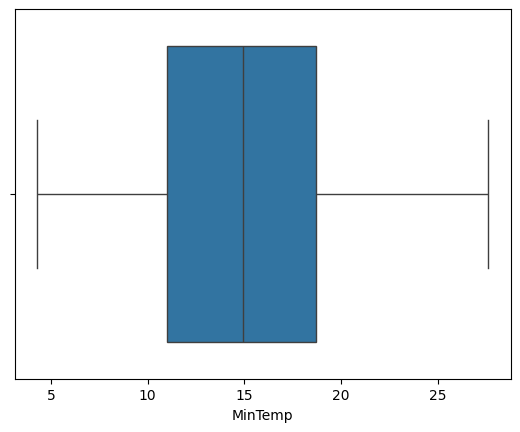

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


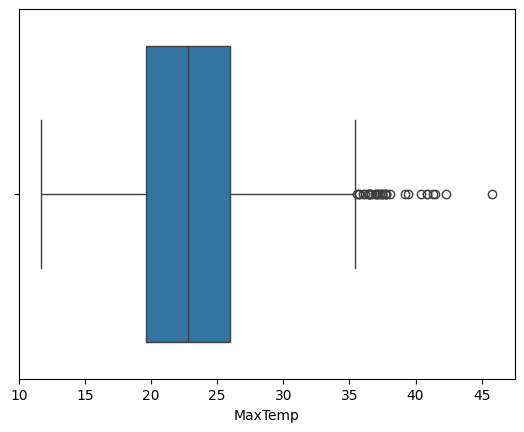

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


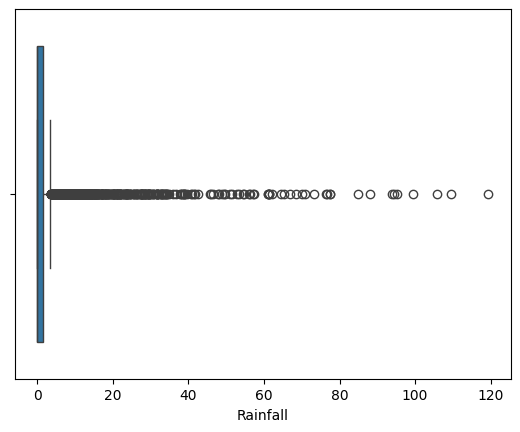

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


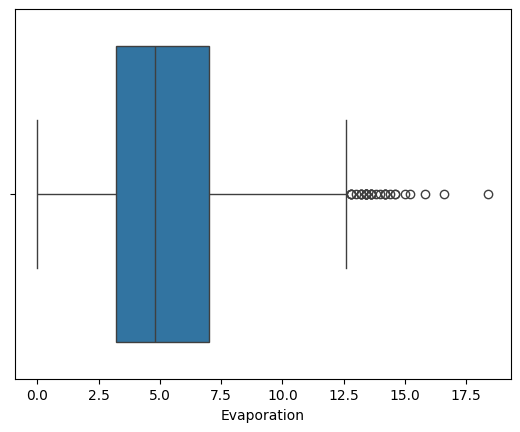

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


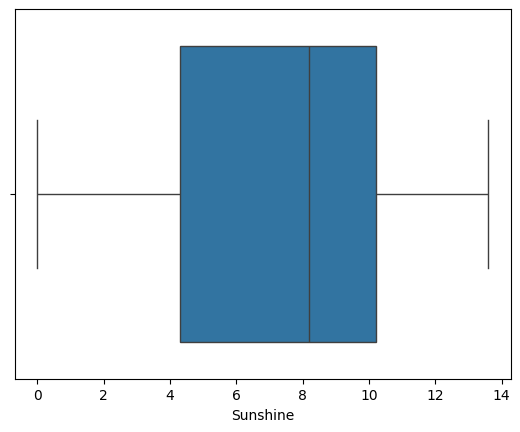

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


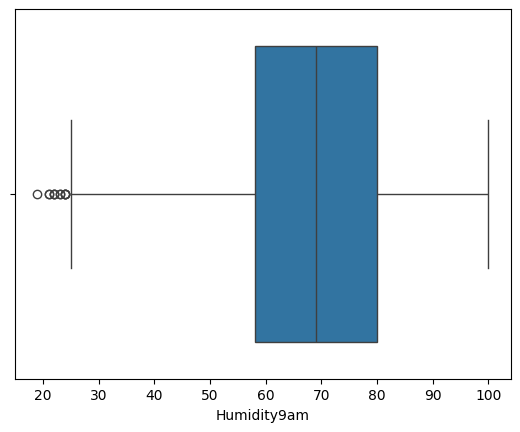

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


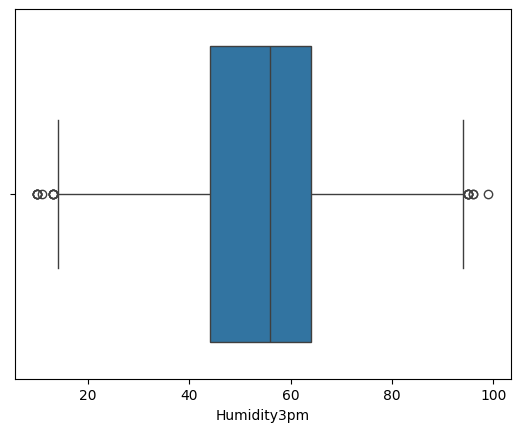

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


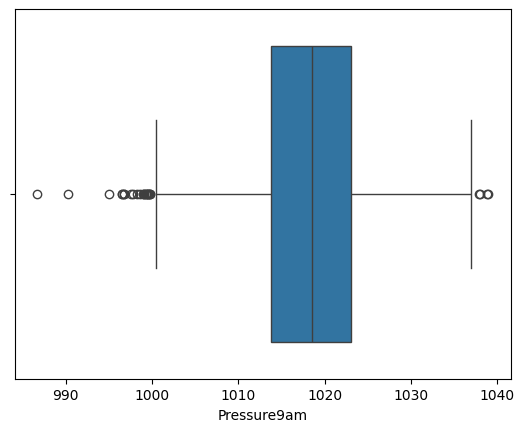

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


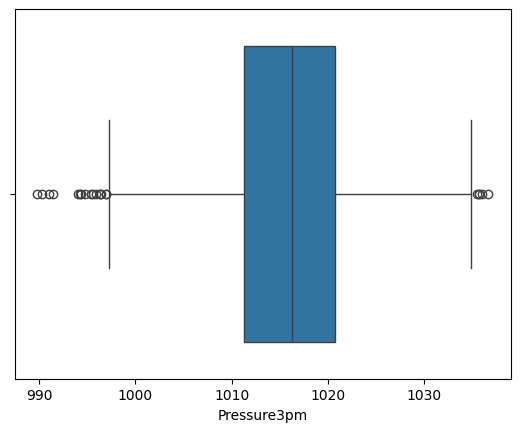

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


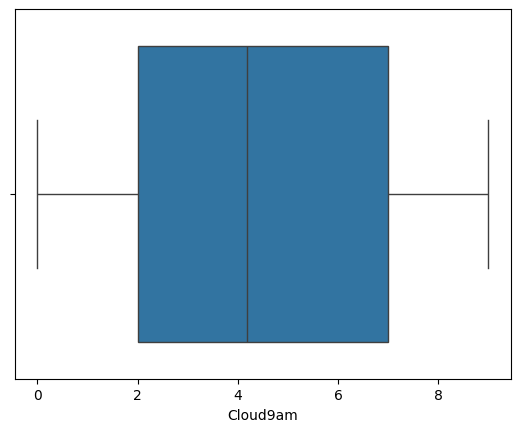

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


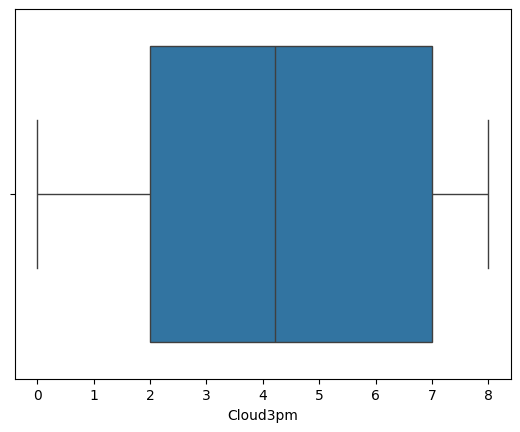

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


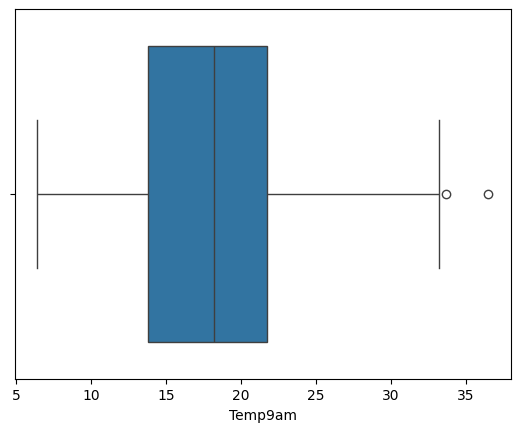

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


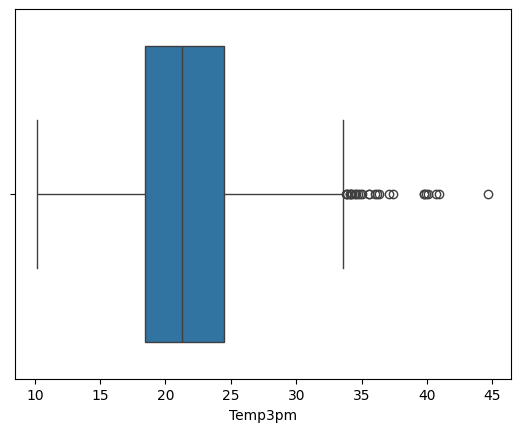

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


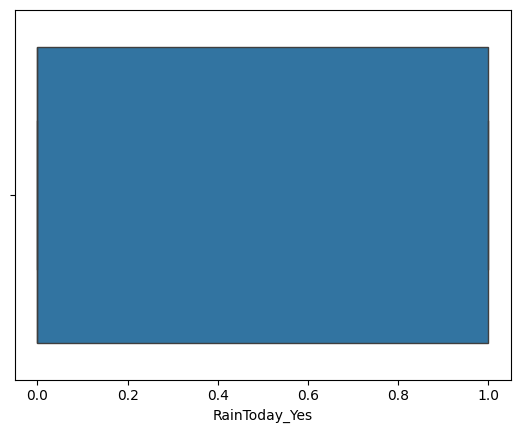

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


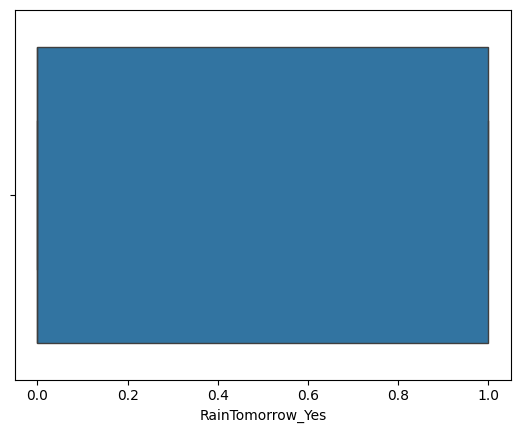

In [ ]:
# Create box plots for each numerical feature
for col in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[col])
    plt.show()

# Remove outliers using IQR method

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


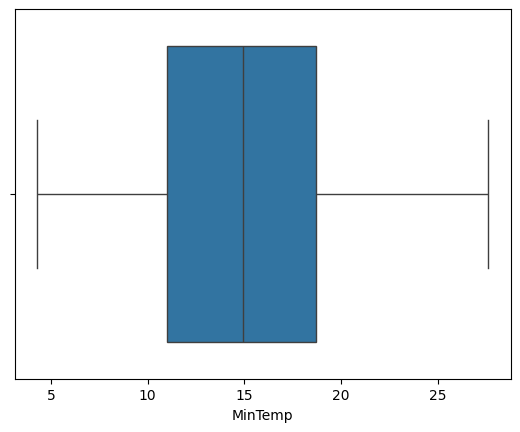

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


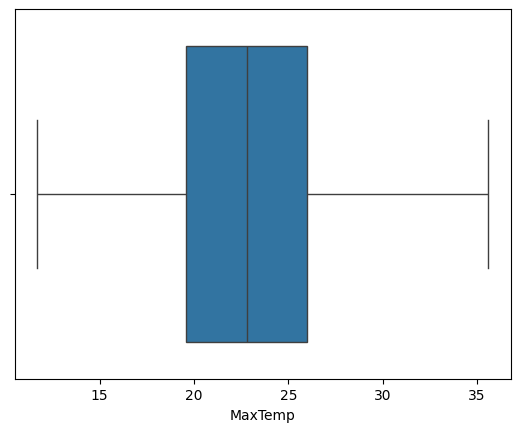

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


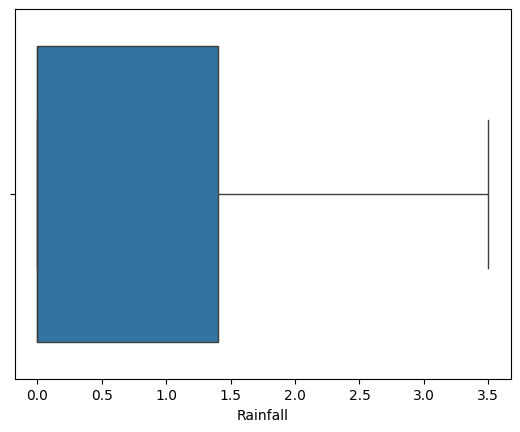

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


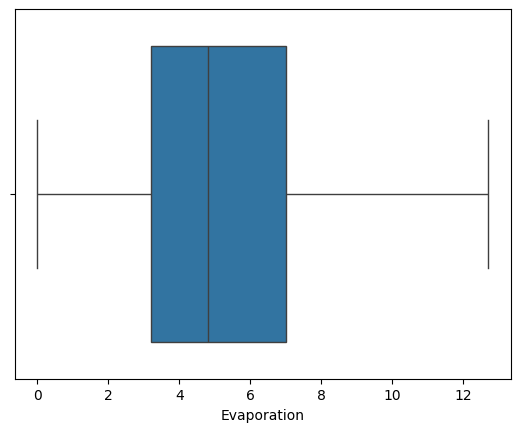

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


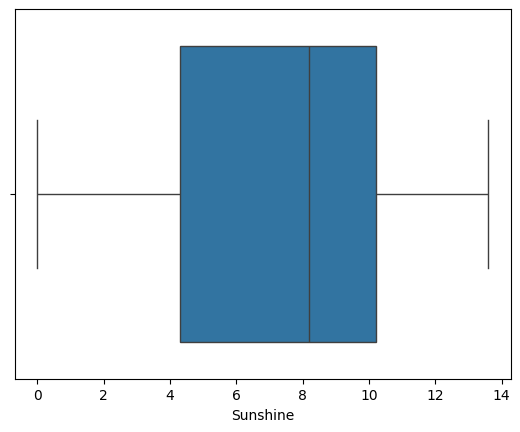

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


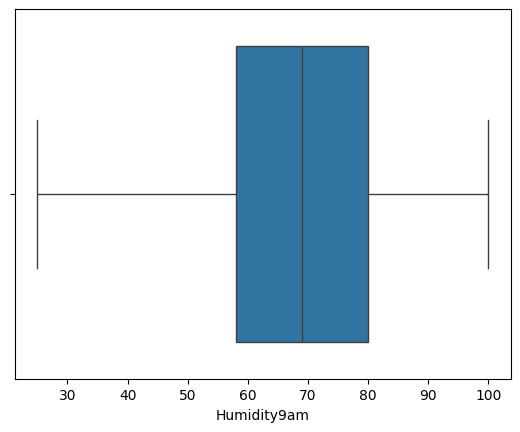

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


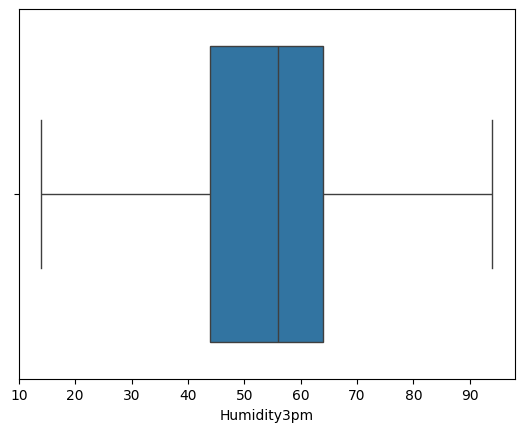

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


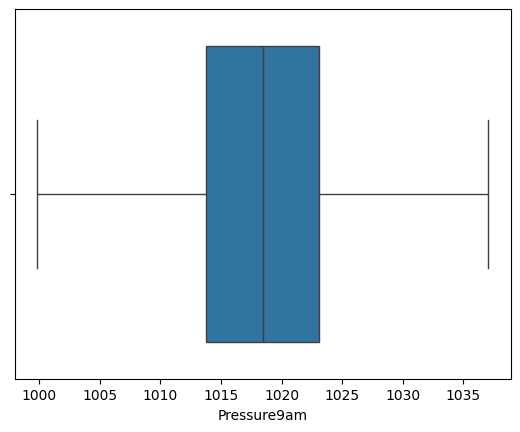

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


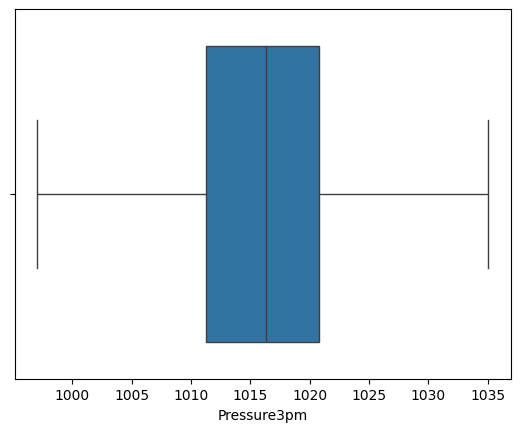

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


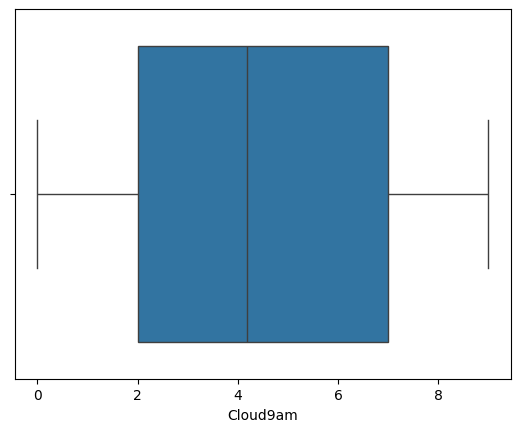

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


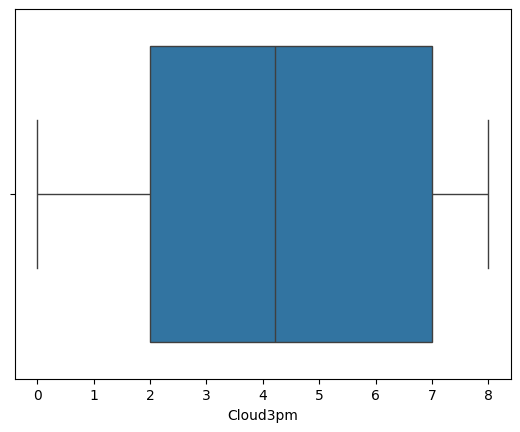

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


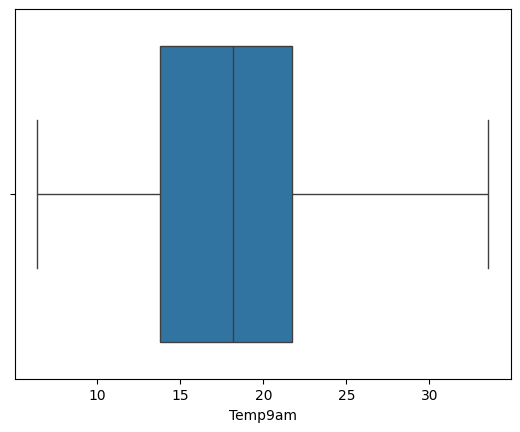

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


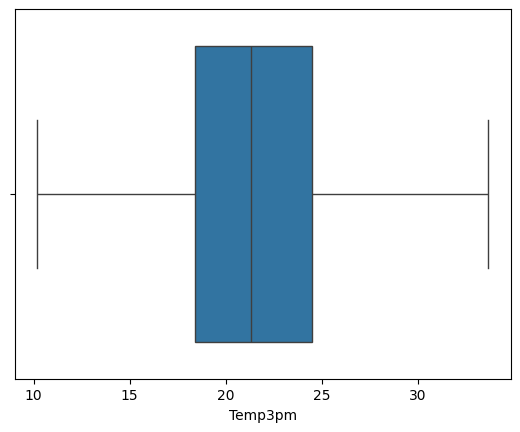

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


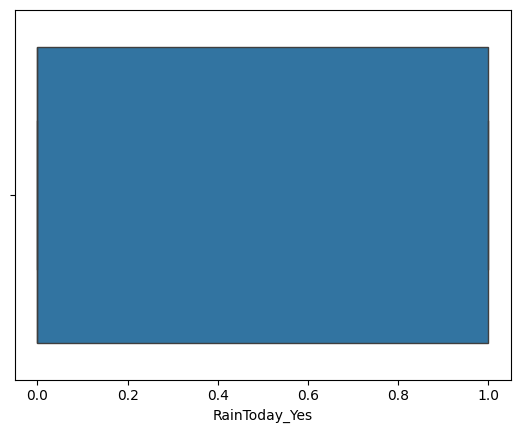

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


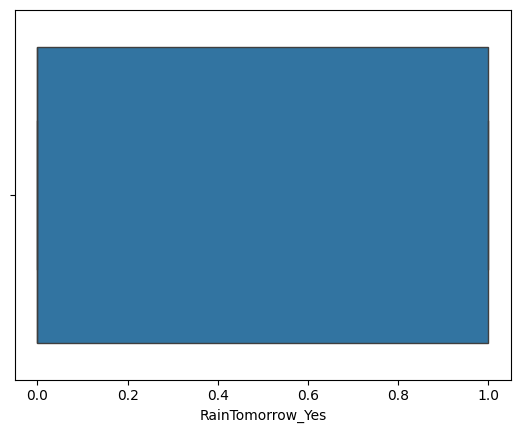

In [ ]:
# Calculate the Interquartile Range (IQR) for each numerical feature
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for each feature
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Replace outliers with the lower or upper bound
for col in df.select_dtypes(include=np.number).columns:
    df[col] = np.where((df[col] < lower_bound[col]), lower_bound[col], df[col])
    df[col] = np.where((df[col] > upper_bound[col]), upper_bound[col], df[col])

# Check for outliers again
for col in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[col])
    plt.show()

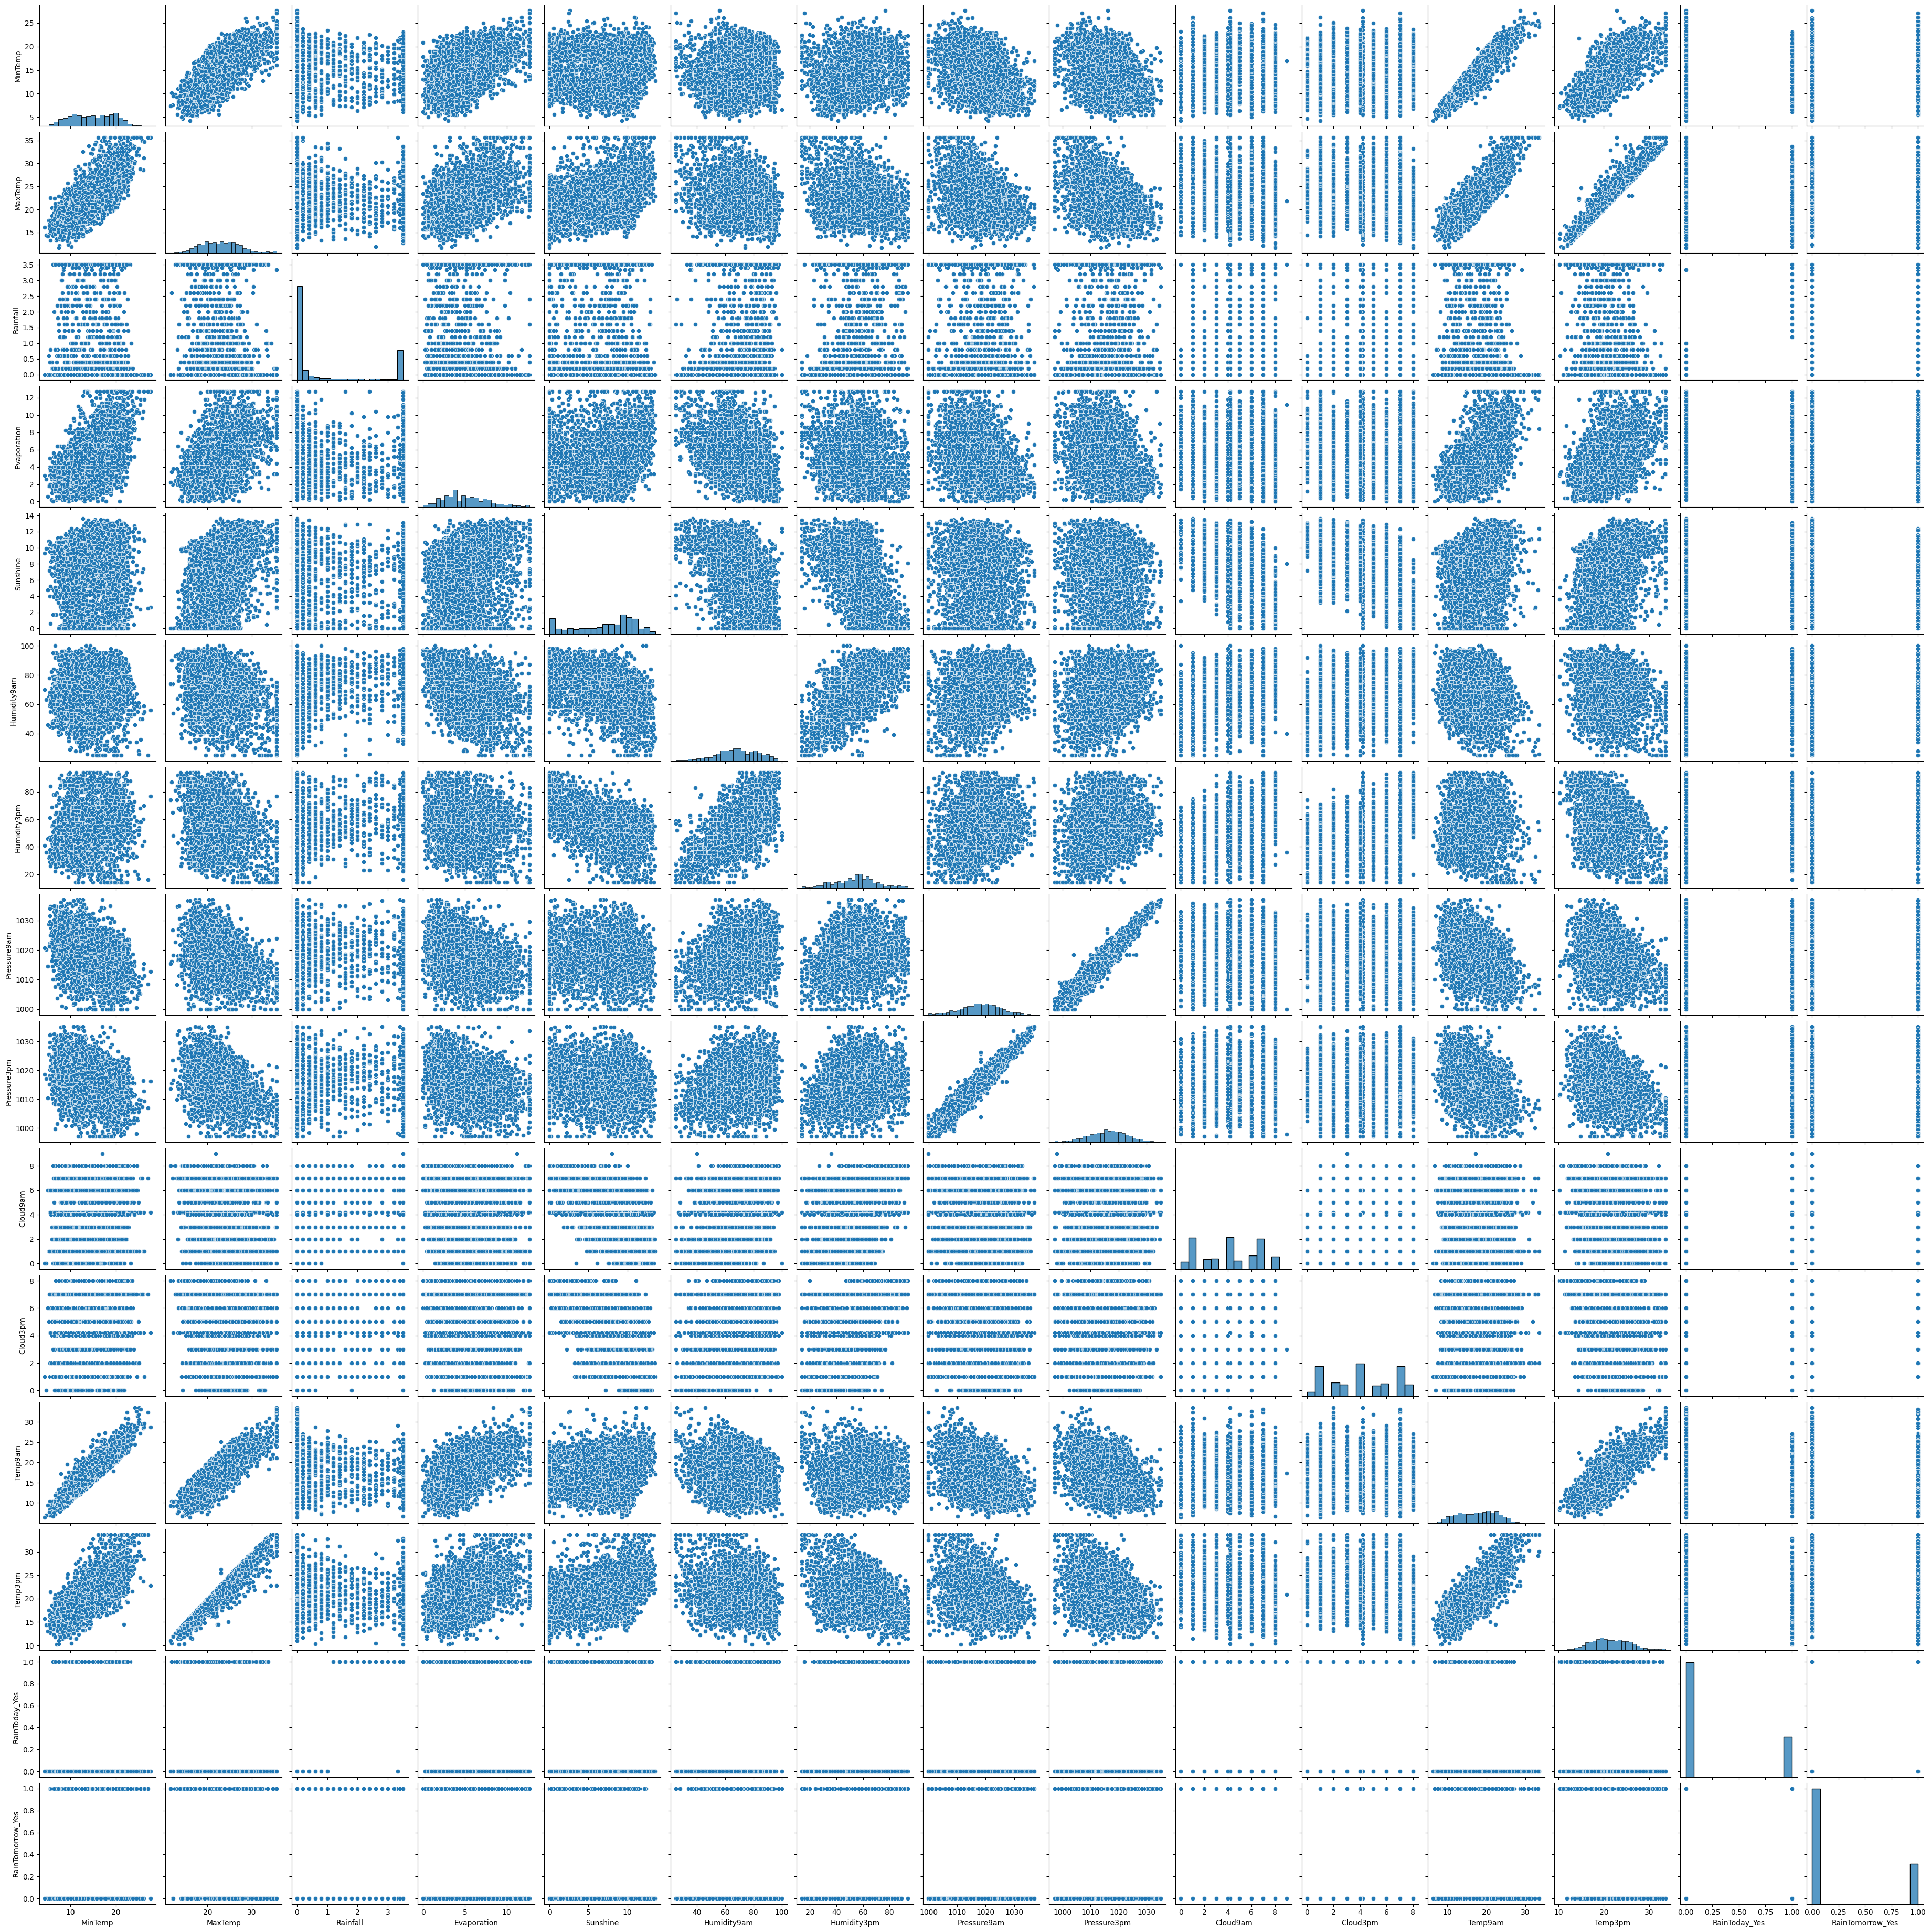

In [ ]:
# Create a pairplot to visualize relationships between numerical features
sns.pairplot(df)
plt.show()

## Correlation Matrix

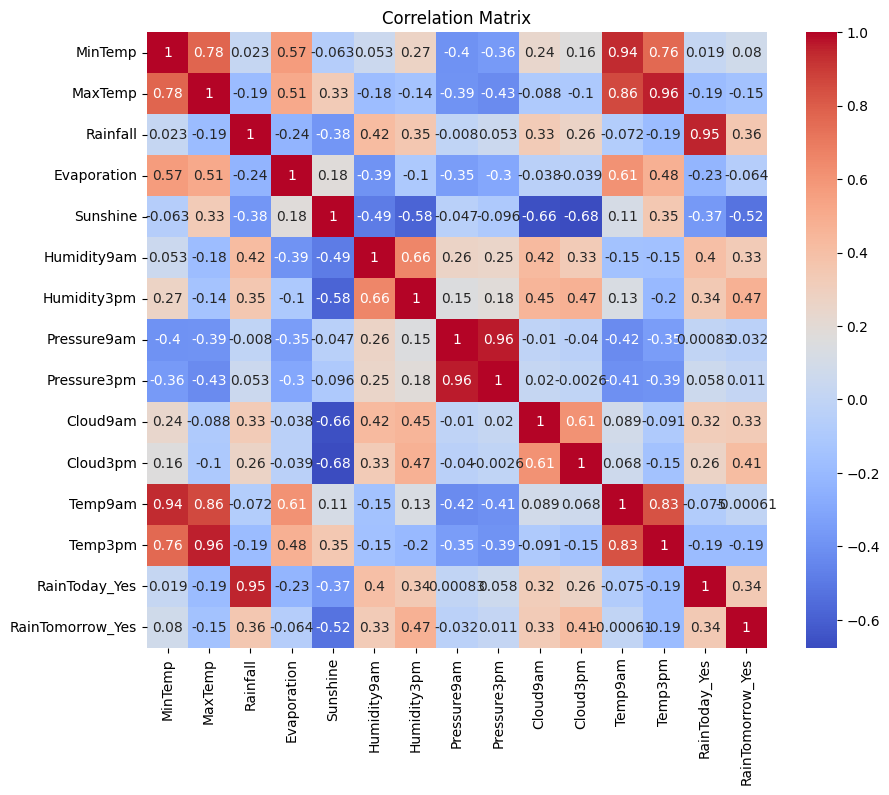

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Define features and target varible then split data into training and testing set

In [ ]:
# Define the features and target variable
x = df.drop('RainTomorrow_Yes', axis=1)  # Features
y = df['RainTomorrow_Yes']  # Target variable

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create the model

## DecisionTree Classifier

In [ ]:
from sklearn import tree

# Initialize and fit the decision tree classifier
clftree= tree.DecisionTreeClassifier(max_depth=3)
clftree.fit(x_train, y_train)

# Make prediction
y_train_pred= clftree.predict(x_train)
y_test_pred= clftree.predict(x_test)

# Evaluate confusion matrix and accuracy score
cm_dt_train=confusion_matrix(y_train, y_train_pred)
as_dt_train=accuracy_score(y_train, y_train_pred)

cm_dt_test=confusion_matrix(y_test, y_test_pred)
as_dt_test=accuracy_score(y_test, y_test_pred)

# Print the confusion matrix and accuracy score

print("Confusion Matrix(Test):", cm_dt_test)
print("accuracy score(test):", as_dt_test)
print("confusion matrix(Train):", cm_dt_train)
print("accuracy score(Train):", as_dt_train)

Confusion Matrix(Test): [[430  54]
 [ 78 106]]
accuracy score(test): 0.8023952095808383
confusion matrix(Train): [[1815  173]
 [ 288  393]]
accuracy score(Train): 0.8272761333832896


## Plotting decision Tree

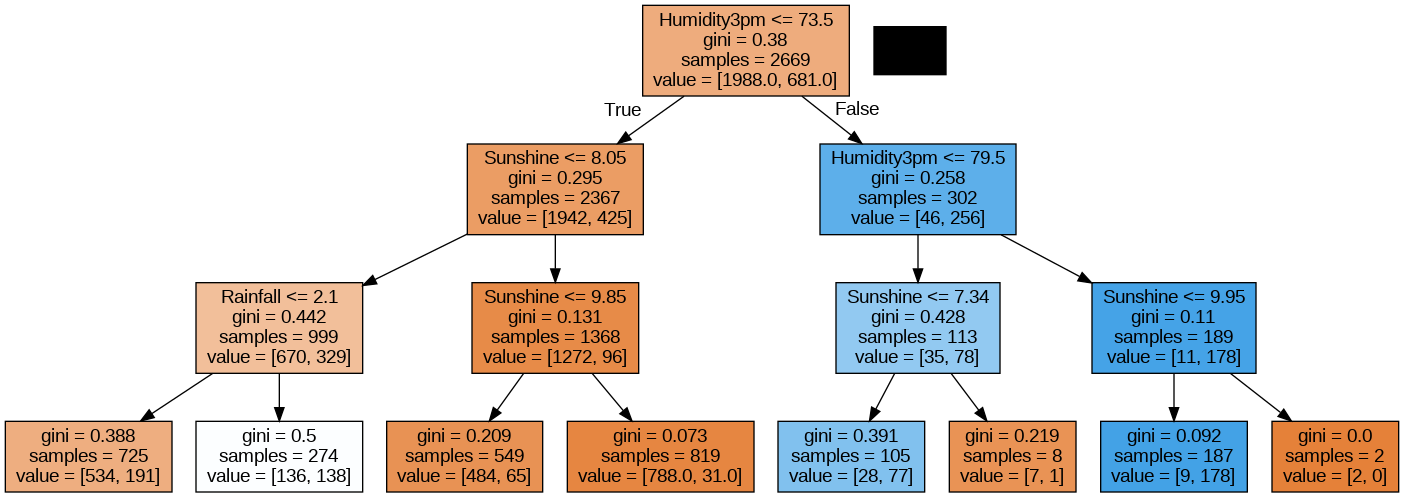

In [ ]:
dot_data= tree.export_graphviz(clftree, out_file=None, feature_names=x.columns, filled=True)

from IPython.display import Image
import pydotplus
graph= pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Controlling Tree growth

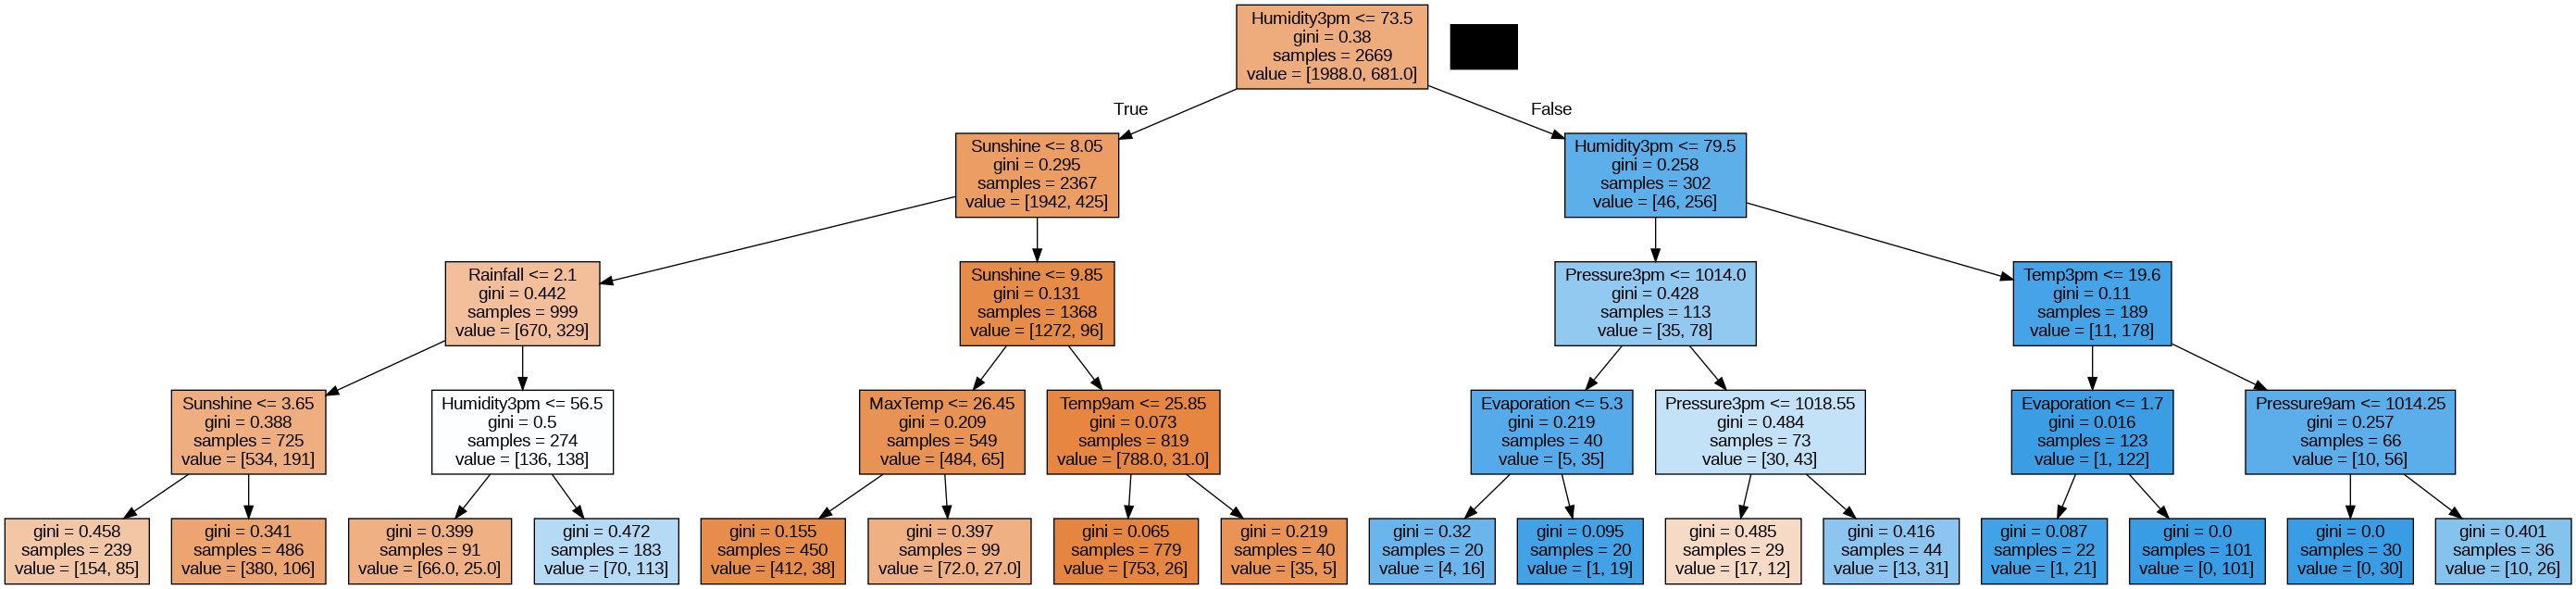

In [ ]:
# Initialize and fit the decision tree classifier
clftree2= tree.DecisionTreeClassifier(min_samples_leaf= 20, max_depth=4)
clftree2.fit(x_train, y_train)

# Plotting decision tree

dot_data2= tree.export_graphviz(clftree2, out_file=None, feature_names=x.columns, filled=True)
graph2= pydotplus.graph_from_dot_data(dot_data2)
image2= Image(graph2.create_png())
image2

In [ ]:
accuracy_score(y_test,clftree2.predict(x_test) )

0.8053892215568862

# Bagging

In [ ]:
from sklearn import tree

from sklearn.ensemble import BaggingClassifier

# Create a DecisionTreeClassifier as the base estimator with specified parameters
clftree_bg = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)

# Initialize and fit the  classifier
bag_clf= BaggingClassifier(estimator=clftree_bg, n_estimators=1000, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(x_train, y_train)
# Evaluate confusion matrix and accuracy score with prediction
cm_b_test=confusion_matrix(y_test, bag_clf.predict(x_test))
as_b_test= accuracy_score(y_test, bag_clf.predict(x_test))

cm_b_train= confusion_matrix(y_train, bag_clf.predict(x_train))
as_b_train= accuracy_score(y_train, bag_clf.predict(x_train))

# Print the confusion matrix and accuracy score

print("Confusion Matrix(Test):", cm_b_test)
print("accuracy score(test):", as_b_test)
print("confusion matrix(Train):", cm_b_train)
print("accuracy score(Train):", as_b_train)



Confusion Matrix(Test): [[459  25]
 [ 89  95]]
accuracy score(test): 0.8293413173652695
confusion matrix(Train): [[1928   60]
 [ 323  358]]
accuracy score(Train): 0.8565005620082428


# Random Forest classifier




In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier with desired parameters
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust parameters like n_estimators

# Fit the model to the training data
rf_clf.fit(x_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = rf_clf.predict(x_train)
y_test_pred = rf_clf.predict(x_test)

# Calculate the confusion matrix and accuracy score for training and testing sets
cm_rf_train = confusion_matrix(y_train, y_train_pred)
as_rf_train = accuracy_score(y_train, y_train_pred)

cm_rf_test = confusion_matrix(y_test, y_test_pred)
as_rf_test = accuracy_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Confusion Matrix (Train):", cm_rf_train)
print("Accuracy Score (Train):", as_rf_train)
print("Confusion Matrix (Test):", cm_rf_test)
print("Accuracy Score (Test):", as_rf_test)

Confusion Matrix (Train): [[1988    0]
 [   1  680]]
Accuracy Score (Train): 0.9996253278381416
Confusion Matrix (Test): [[448  36]
 [ 84 100]]
Accuracy Score (Test): 0.8203592814371258


## Random Forest with GridSearchCV

In [ ]:
# import the liberary
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 5, 10],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

rf_clf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best Random Forest model from the grid search
best_rf_clf = grid_search.best_estimator_

# Make prediction on training and testing sets
best_y_train_pred = best_rf_clf.predict(x_train)
best_y_test_pred = best_rf_clf.predict(x_test)

# Calculate the confusion matrix and accuracy score for training and testing sets
best_cm_rf_train = confusion_matrix(y_train, best_y_train_pred)
best_as_rf_train = accuracy_score(y_train, best_y_train_pred)

best_cm_rf_test = confusion_matrix(y_test, best_y_test_pred)
best_as_rf_test = accuracy_score(y_test, best_y_test_pred)

# Print the evaluation metrics and best parameters
print("Best Parameters:", grid_search.best_params_)
print("Confusion Matrix (Train):", best_cm_rf_train)
print("Best Accuracy Score (Train):", best_as_rf_train)
print("Confusion Matrix (Test):", best_cm_rf_test)
print("Best Accuracy Score (Test):", best_as_rf_test)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Confusion Matrix (Train): [[1938   50]
 [ 332  349]]
Best Accuracy Score (Train): 0.8568752341701011
Confusion Matrix (Test): [[461  23]
 [ 94  90]]
Best Accuracy Score (Test): 0.8248502994011976


# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the GradientBoostingClassifier with desired parameters
gb_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gb_clf.fit(x_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = gb_clf.predict(x_train)
y_test_pred = gb_clf.predict(x_test)


# Calculate the confusion matrix and accuracy score for training and testing sets
cm_gb_train = confusion_matrix(y_train, y_train_pred)
as_gb_train = accuracy_score(y_train, y_train_pred)

cm_gb_test = confusion_matrix(y_test, y_test_pred)
as_gb_test = accuracy_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Confusion Matrix (Train):", cm_gb_train)
print("Accuracy Score (Train):", as_gb_train)
print("Confusion Matrix (Test):", cm_gb_test)
print("Accuracy Score (Test):", as_gb_test)

Confusion Matrix (Train): [[1927   61]
 [ 255  426]]
Accuracy Score (Train): 0.8816035968527538
Confusion Matrix (Test): [[451  33]
 [ 83 101]]
Accuracy Score (Test): 0.8263473053892215


# Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize the AdaBoostClassifier with desired parameters
ada_clf = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)

# Fit the model to the training data
ada_clf.fit(x_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = ada_clf.predict(x_train)
y_test_pred = ada_clf.predict(x_test)

# Calculate the confusion matrix and accuracy score for training and testing sets
cm_ada_train = confusion_matrix(y_train, y_train_pred)
as_ada_train = accuracy_score(y_train, y_train_pred)

cm_ada_test = confusion_matrix(y_test, y_test_pred)
as_ada_test = accuracy_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Confusion Matrix (Train):", cm_ada_train)
print("Accuracy Score (Train):", as_ada_train)
print("Confusion Matrix (Test):", cm_ada_test)
print("Accuracy Score (Test):", as_ada_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Confusion Matrix (Train): [[1887  101]
 [ 301  380]]
Accuracy Score (Train): 0.8493817909329336
Confusion Matrix (Test): [[453  31]
 [ 90  94]]
Accuracy Score (Test): 0.8188622754491018


# XG Boost classifier Model

In [ ]:
from xgboost import XGBClassifier

# Initialize the XGBClassifier with desired parameters
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
xgb_clf.fit(x_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = xgb_clf.predict(x_train)
y_test_pred = xgb_clf.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate the confusion matrix and accuracy score for training and testing sets
cm_xgb_train = confusion_matrix(y_train, y_train_pred)
as_xgb_train = accuracy_score(y_train, y_train_pred)

cm_xgb_test = confusion_matrix(y_test, y_test_pred)
as_xgb_test = accuracy_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Confusion Matrix (Train):", cm_xgb_train)
print("Accuracy Score (Train):", as_xgb_train)
print("Confusion Matrix (Test):", cm_xgb_test)
print("Accuracy Score (Test):", as_xgb_test)

Confusion Matrix (Train): [[1916   72]
 [ 275  406]]
Accuracy Score (Train): 0.8699887598351442
Confusion Matrix (Test): [[451  33]
 [ 85  99]]
Accuracy Score (Test): 0.8233532934131736


# Linear Discriminant Analysis

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Initialize the LinearDiscriminantAnalysis classifier
lda_clf = LinearDiscriminantAnalysis()

# Fit the model to the training data
lda_clf.fit(x_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = lda_clf.predict(x_train)
y_test_pred = lda_clf.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate the confusion matrix and accuracy score for training and testing sets
cm_lda_train = confusion_matrix(y_train, y_train_pred)
as_lda_train = accuracy_score(y_train, y_train_pred)

cm_lda_test = confusion_matrix(y_test, y_test_pred)
as_lda_test = accuracy_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Confusion Matrix (Train):", cm_lda_train)
print("Accuracy Score (Train):", as_lda_train)
print("Confusion Matrix (Test):", cm_lda_test)
print("Accuracy Score (Test):", as_lda_test)


Confusion Matrix (Train): [[1823  165]
 [ 280  401]]
Accuracy Score (Train): 0.8332708879730236
Confusion Matrix (Test): [[442  42]
 [ 76 108]]
Accuracy Score (Test): 0.8233532934131736


# Logistic Regression classification

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the LogisticRegression classifier with desired parameters
logreg_clf = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model to the training data
logreg_clf.fit(x_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = logreg_clf.predict(x_train)
y_test_pred = logreg_clf.predict(x_test)

# Calculate the confusion matrix and accuracy score for training and testing sets
cm_logreg_train = confusion_matrix(y_train, y_train_pred)
as_logreg_train = accuracy_score(y_train, y_train_pred)

cm_logreg_test = confusion_matrix(y_test, y_test_pred)
as_logreg_test = accuracy_score(y_test, y_test_pred)

# Print the evaluation metrics
print("Confusion Matrix (Train):", cm_logreg_train)
print("Accuracy Score (Train):", as_logreg_train)
print("Confusion Matrix (Test):", cm_logreg_test)
print("Accuracy Score (Test):", as_logreg_test)

Confusion Matrix (Train): [[1854  134]
 [ 294  387]]
Accuracy Score (Train): 0.839640314724616
Confusion Matrix (Test): [[445  39]
 [ 77 107]]
Accuracy Score (Test): 0.8263473053892215


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)  # Fit only on training data to avoid data leakage

# Transform training and testing data using the scaler
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

knn_clf_scaled = KNeighborsClassifier(n_neighbors=5)  # we can adjust the number of neighbors (k)
knn_clf_scaled.fit(x_train_scaled, y_train)

# Make prediction using scales data
y_train_pred_scaled = knn_clf_scaled.predict(x_train_scaled)
y_test_pred_scaled = knn_clf_scaled.predict(x_test_scaled)

# Calculate the confusion matrix and accuracy score for training and testing sets
cm_knn_train_scaled = confusion_matrix(y_train, y_train_pred_scaled)
as_knn_train_scaled = accuracy_score(y_train, y_train_pred_scaled)

cm_knn_test_scaled = confusion_matrix(y_test, y_test_pred_scaled)
as_knn_test_scaled = accuracy_score(y_test, y_test_pred_scaled)

# Print the evaluation metrics
print("Confusion Matrix (Train):", cm_knn_train_scaled)
print("Accuracy Score (Train):", as_knn_train_scaled)
print("Confusion Matrix (Test):", cm_knn_test_scaled)
print("Accuracy Score (Test):", as_knn_test_scaled)

Confusion Matrix (Train): [[1888  100]
 [ 262  419]]
Accuracy Score (Train): 0.8643686774072686
Confusion Matrix (Test): [[431  53]
 [ 76 108]]
Accuracy Score (Test): 0.8068862275449101


# Now we draw bar chart for each model

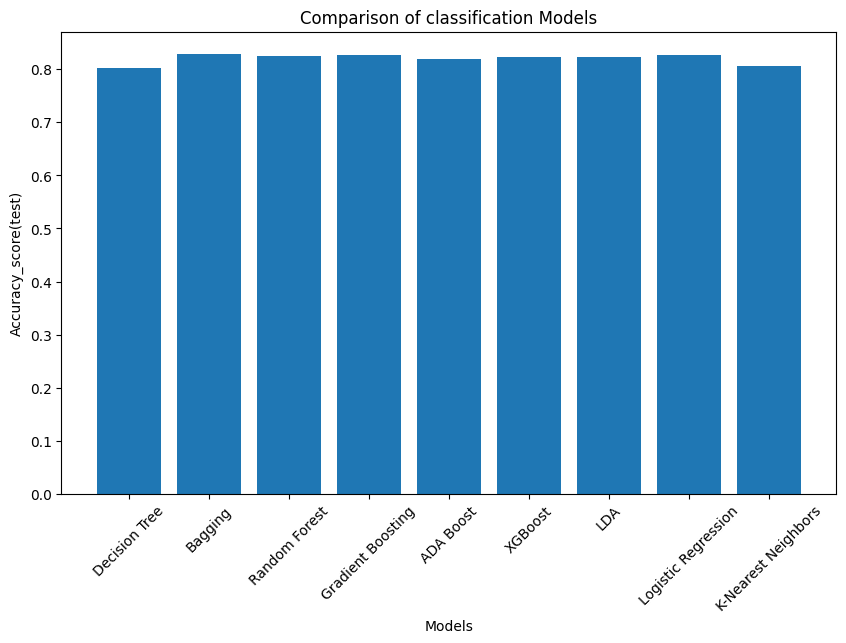

In [ ]:
# Create a list of model names
model_names = ['Decision Tree', 'Bagging','Random Forest','Gradient Boosting','ADA Boost', 'XGBoost','LDA','Logistic Regression', 'K-Nearest Neighbors']

# Create a list of Accuracy score for each model
Accuracy_score= [as_dt_test, as_b_test, best_as_rf_test, as_gb_test, as_ada_test, as_xgb_test, as_lda_test, as_logreg_test, as_knn_test_scaled]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(model_names, Accuracy_score)
plt.xlabel('Models')
plt.ylabel('Accuracy_score(test)')
plt.title('Comparison of classification Models')
plt.xticks(rotation=45)
plt.show()

**Q.4 Which model’s performance is best and what could be the possible reason for that?**

Ans- According to above model performance Gradient Boosting performed the best because of its ability to learn from mistakes iteratively and handle complex relationships in the data effectively.Gradient Boosting performed the best with a training accuracy of 0.88 and a test accuracy of 0.82.
#### Gradient boost performed best due to following reasion
Gradient Boosting builds models in a sequential way, where each model tries to correct the errors made by the previous model. This process helps the model become more accurate over time.
##### The high training accuracy (0.88) indicates that the model has learned the patterns in the data very well.
##### Even  its test accuracy (0.82) is similar to other models, Gradient Boosting's ability to fine-tune itself by correcting mistakes makes it perform slightly better overall, especially on more complex data relationships.
#### There are many possible reasion for that like
* Reducing Bias and Variance: Gradient Boosting works well at reducing both bias (simplistic predictions) and variance (overfitting), striking a balance that makes it more accurate.
* Handling Non-linear Data: The weather data likely contains complex relationships between the features (like temperature, humidity, etc.), and Gradient Boosting is very good at capturing such complexities.

**Q.5  What steps can you take to improve this selected model’s performance even further?**

Ans- To further improve the performance of the Gradient Boosting model, we can take several steps. These techniques will help the model learn better patterns from the data and avoid overfitting.
* **Hyperparameter tuning:**
 using tuning the parameters of the model like the learning rate, number of trees, depth of each tree, etc.
 * Use techniques like Grid Search or Randomized Search to find the best combination of hyperparameters.
 * **Increase the Number of Trees:**
 Adding more decision trees to the model.
 But we need to be carefull  not to add too many trees, as it may lead to overfitting.
 * **Reduce Learning Rate:**
 The learning rate controls how much the model adjusts after each new tree is added.A smaller learning rate can make the model learn more slowly, but in a more controlled and precise way
 * **Feature Selection:**Removing irrelevant or redundant features that do not help the model.
 * **Cross-Validation:**Using technique like  k-fold cross-validation, the data is divided into “k” parts, and the model is trained and tested “k” times, each time on a different fold.